<a href="https://colab.research.google.com/github/hariomvyas/MLProjects/blob/main/Data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
df = pd.read_csv('faithful.csv')

In [ ]:
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


# P1 - A
Create and print out a scatter plot of this dataset, eruption time versus waiting time. (10 points)

<function matplotlib.pyplot.show(*args, **kw)>

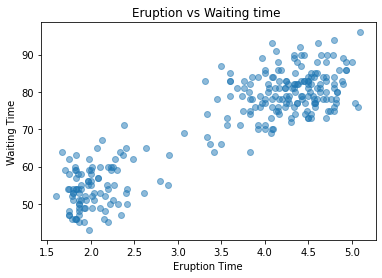

In [ ]:
plt.scatter(df['eruptions'], df['waiting'], alpha=0.5)
plt.title("Eruption vs Waiting time ")
plt.xlabel("Eruption Time")
plt.ylabel("Waiting Time")
plt.show

# P1 - B
How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters. (5 points)

# Answer

From the above plot i can observe that there are two different clusters. One cluster which has a lower eruption time and waiting time while the other cluster has higher eruption time and waiting time.

From the Observation,  I can conclude that if the waiting time of the geyser is high,  we can see longer eruptions.

# P1 - C

Hierarchical clustering is one of the unsupervised method where in we can cluster a group of datapoints into certain number of clusters.

Hierarchial Clustering method works by grouping datapoints into a tree of clusters which is called as dendrogram. The important point to note is that this algorithm considers every datapoint as a separate cluster. Once it identifies any two cluster that are close together,  it merges those two clusters and treates it as a single cluster again. this process is repeated over until all clusters are grouped.

Algorithm for Hierarchical Clustering :

1. consider all points as cluster
2. calculate the similarity of one cluster with all other clusters
3. merge the clusters which are highly similar or close to each other
4. recalculate the proximity matrix for each cluster
5. repeat the steps 3 and 4 until only a single cluster remains.

k-means vs Hierachial
* Unlike in k-means clustering,  we really dont need to know the number of clusters prior.
* k-means does not give clusters based on heirachy, while the hierachial custering methods tells us about the heirachy of the clusters.
* k-means will be ideal for larger dataset while the hierachial clustering is useful when dataset is smaller.

# Based on your scatter plot, would this method be appropriate for this dataset?

 Its highly dependent upon our final goal, since the dataset is smaller,  we can implement the hierachial clustering and see how the hierachy goes.


# Kmeans from Scratch


In [ ]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [ ]:
def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = df.sample(n=k).values
  while diff:
     # for each observation
    for i, row in enumerate(X):
      mn_dist = float('inf')
        # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
        if mn_dist > d:
              mn_dist = d
              cluster[i] = idx
      new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
    else:
        centroids = new_centroids
  return centroids, cluster

In [ ]:
cost_list = []
X = df.values

for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

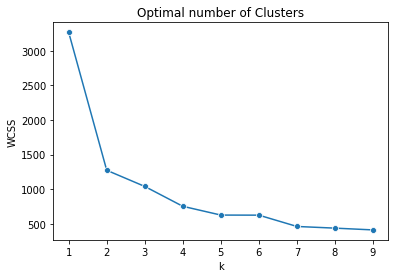

In [ ]:
import seaborn as sns


sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Optimal number of Clusters")
plt.show()


The Above plot represent the elbow method where in we can see the optimal number of cluster that we can obtain from our data. ^^

From the cluster 1 -> 2 we can observe a great difference in squared distance. But from 2 -> 3 and 3 -> 4 we are not able observe that much difference.

so selecting clusters 1 and 2 will be the right option.

In [ ]:
k = 2
centroids, cluster = kmeans(X, k)

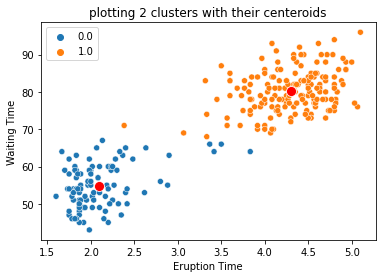

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='Red')
plt.xlabel("Eruption Time")
plt.ylabel("Waiting Time")
plt.title("plotting 2 clusters with their centeroids")
plt.show()


 ------**** number of clusters  1  ****------- 



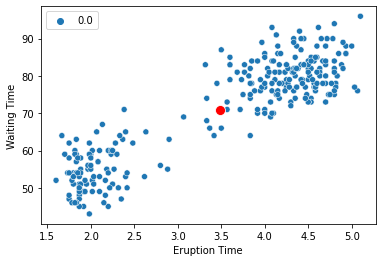


 ------**** number of clusters  2  ****------- 



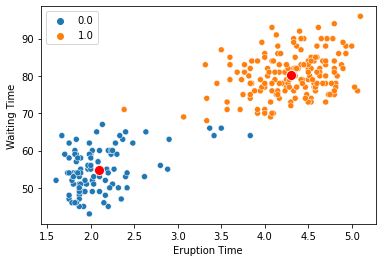


 ------**** number of clusters  3  ****------- 



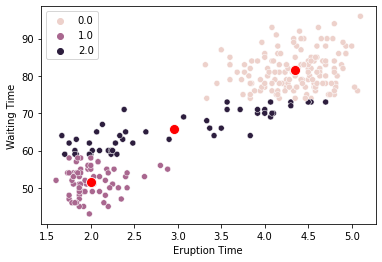


 ------**** number of clusters  4  ****------- 



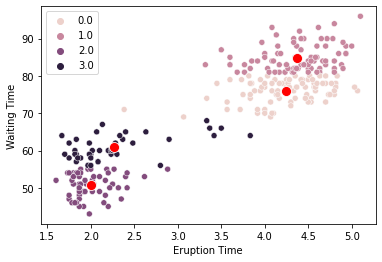


 ------**** number of clusters  5  ****------- 



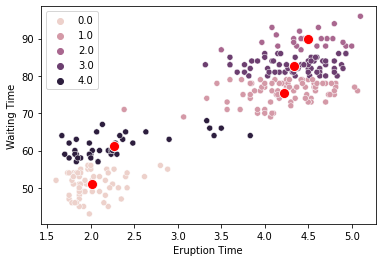


 ------**** number of clusters  6  ****------- 



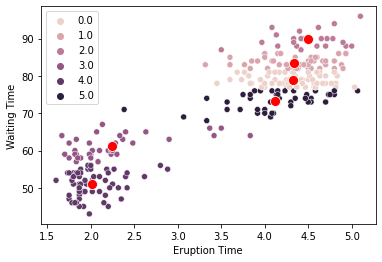


 ------**** number of clusters  7  ****------- 



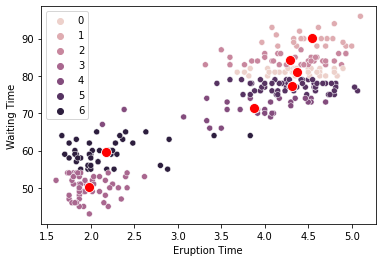


 ------**** number of clusters  8  ****------- 



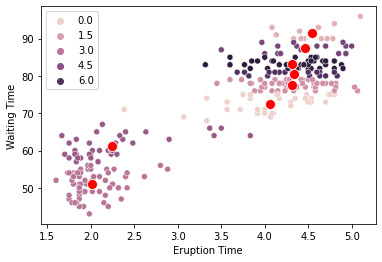


 ------**** number of clusters  9  ****------- 



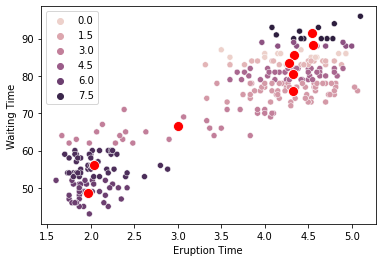

In [ ]:
for k in range(1,10):
  centroids, cluster = kmeans(X, k)
  sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
  sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color="Red")
  print("\n", "------**** number of clusters ", k, " ****-------", "\n")
  plt.xlabel("Eruption Time")
  plt.ylabel("Waiting Time")
  plt.show()


I have plotted a range of clusters starting with 1 cluster upto 10 clusters with their centroids.